In [1]:
### Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
## df available on: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

### .csv read
data = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv", delimiter=',')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
### Discovering field types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [79]:
### Describing numeric fields

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [80]:
### Describing str fields

data.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [81]:
### Transpose to see sample of all columns

data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [82]:
### 'Total charges' was read as str

# Converting 'Total charges' to float
data.loc[data['TotalCharges'] == " ", 'TotalCharges'] = 0
data = data.astype({'TotalCharges':float})

# Converting 'SeniorCitizen' to str
data['SeniorCitizen'] = data['SeniorCitizen'].replace(1, 'Yes')
data['SeniorCitizen'] = data['SeniorCitizen'].replace(0, 'No')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **UNIVARIABLE EDA**

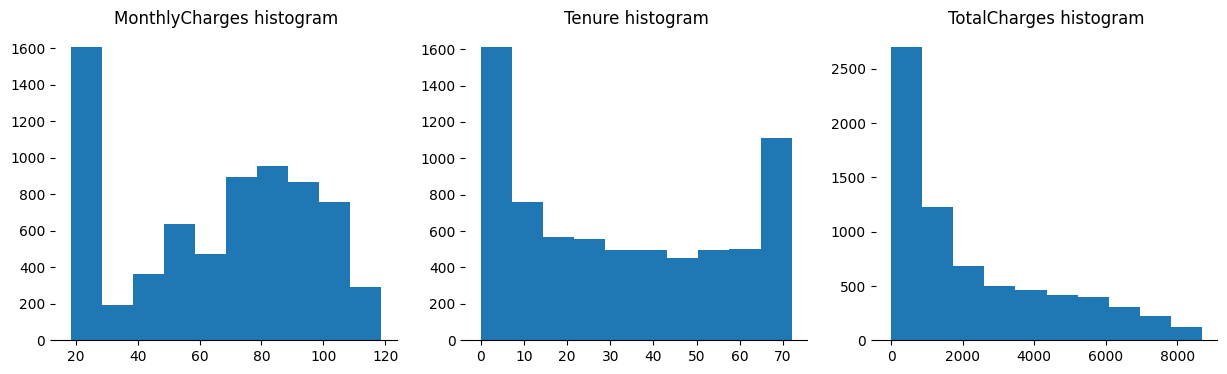

In [83]:
### Histograms of monthly charges, tenure and total charges

fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0].hist(data.MonthlyCharges, bins=10)
ax[0].set_title('MonthlyCharges histogram')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].hist(data.tenure, bins=10)
ax[1].set_title('Tenure histogram')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[2].hist(data.TotalCharges, bins=10)
ax[2].set_title('TotalCharges histogram')
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)

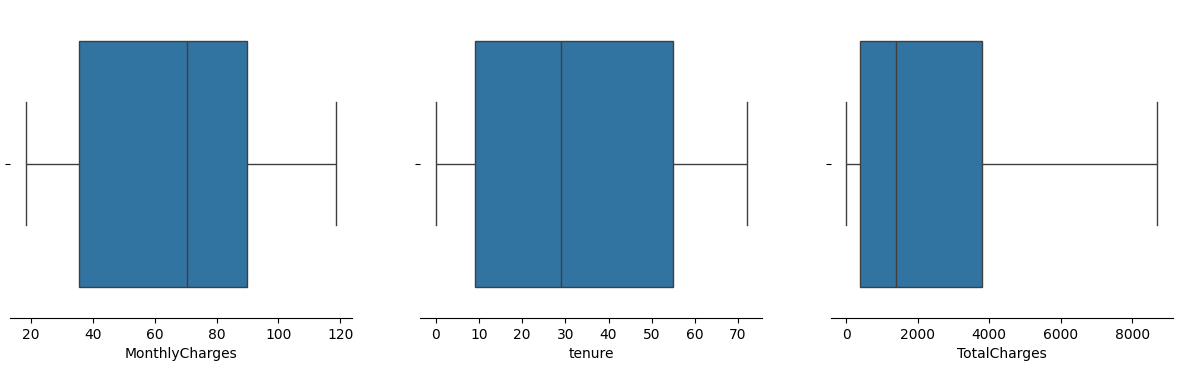

In [84]:
### Boxplots of monthly charges, tenure and total charges

fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.boxplot(ax=ax[0], data=data, x='MonthlyCharges')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
sns.boxplot(ax=ax[1], data=data, x='tenure')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
sns.boxplot(ax=ax[2], data=data, x='TotalCharges')
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)

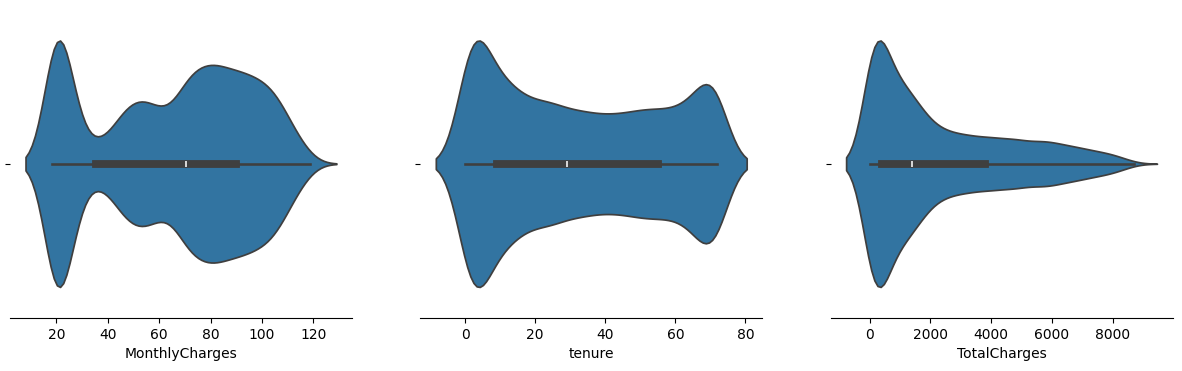

In [85]:
### Violin plots of monthly charges, tenure and total charges

fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.violinplot(ax=ax[0], data=data, x='MonthlyCharges')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
sns.violinplot(ax=ax[1], data=data, x='tenure')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
sns.violinplot(ax=ax[2], data=data, x='TotalCharges')
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)

In [86]:
### Creating plot pie function

def plot_pie(ax, df, var, titulo):
    explode = tuple(np.repeat(0.01, len(df[var].unique())))
    df_pie = df[var].value_counts().reset_index()
    ax.pie(df_pie['count'], labels = df_pie[var],
        autopct = "%1.1f%%", pctdistance = 0.8,
        explode = explode)
    centre_circle = plt.Circle((0.0, 0.0), 0.5, fc = 'white')
    ax.add_patch(centre_circle)
    ax.set_title(titulo)
    ax.legend(df_pie[var], loc = "best", frameon = False)

In [87]:
### Creating array of all categoric columns
cols_categoric = data.columns.difference(['TotalCharges', 'tenure', 'MonthlyCharges']).values
cols_categoric

# 18 columns

array(['Churn', 'Contract', 'Dependents', 'DeviceProtection',
       'InternetService', 'MultipleLines', 'OnlineBackup',
       'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PaymentMethod',
       'PhoneService', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV',
       'TechSupport', 'customerID', 'gender'], dtype=object)

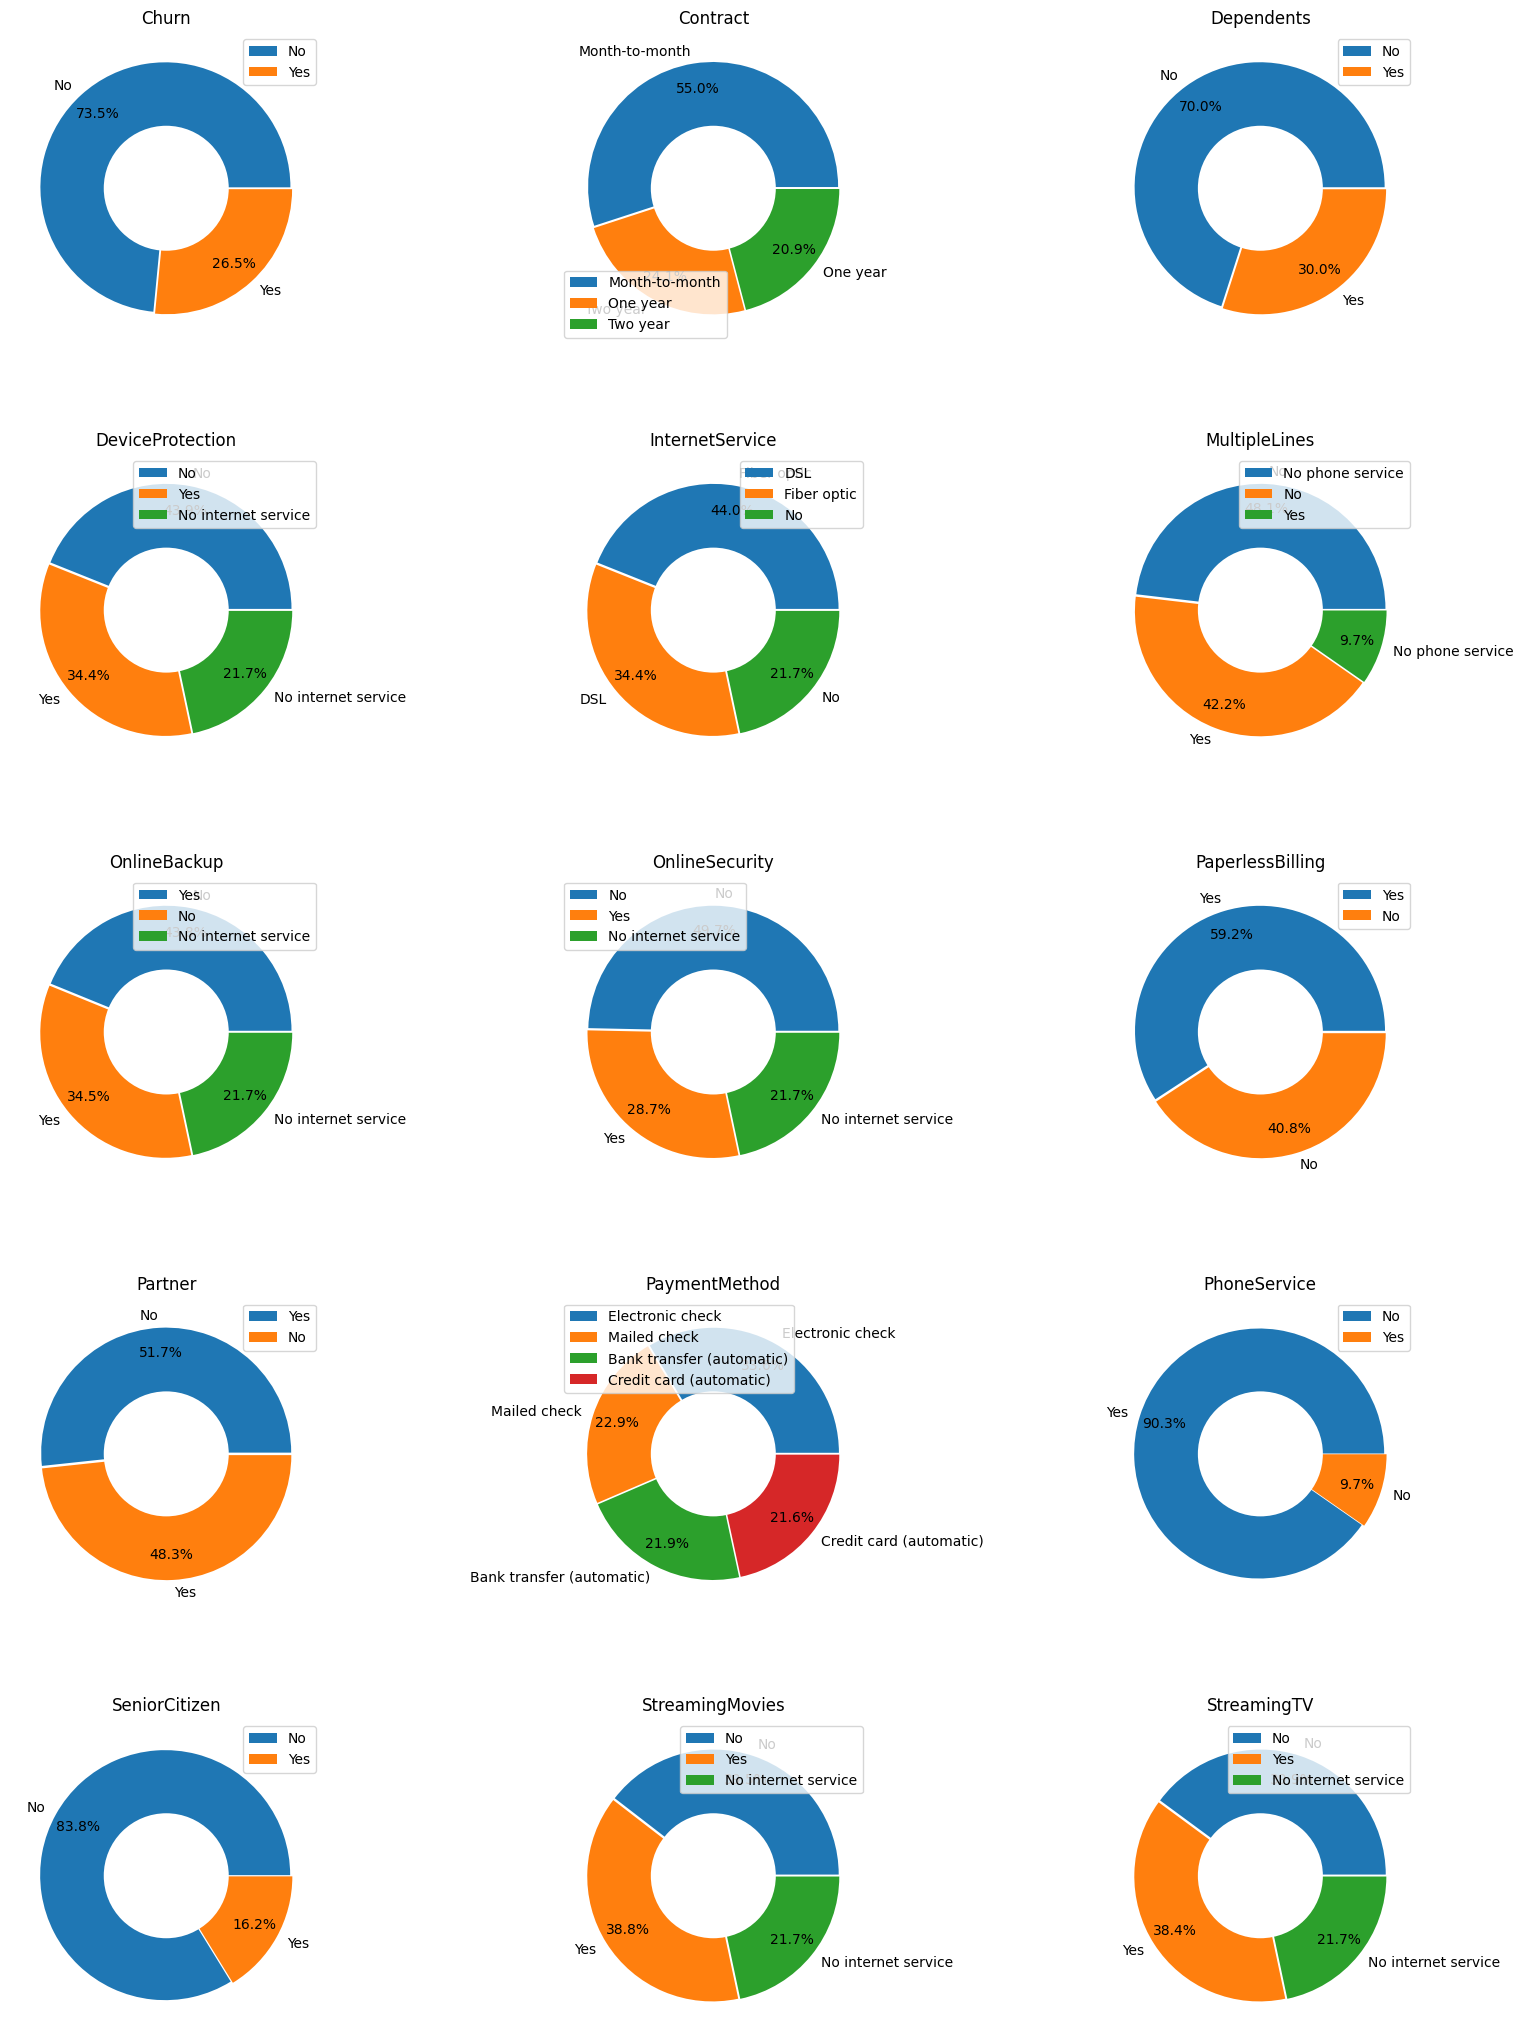

In [88]:
### Analysis of categoric variables distribution

columns = 3
if (len(cols_categoric)%columns) != 0:
  rows = (len(cols_categoric)//columns)
else:
  rows = (len(cols_categoric)//columns) - 1

fig, ax = plt.subplots(rows, columns, figsize = (20,25))

k = 0
for i in range(0,rows):
  for j in range(0,columns):
    plot_pie(ax[i][j], data, cols_categoric[k], cols_categoric[k])
    aux = data[cols_categoric[k]].unique()
    ax[i][j].legend(labels=aux, loc="best")
    k+=1  

#plt.tight_layout()
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

### **BIVARIABLE EDA**

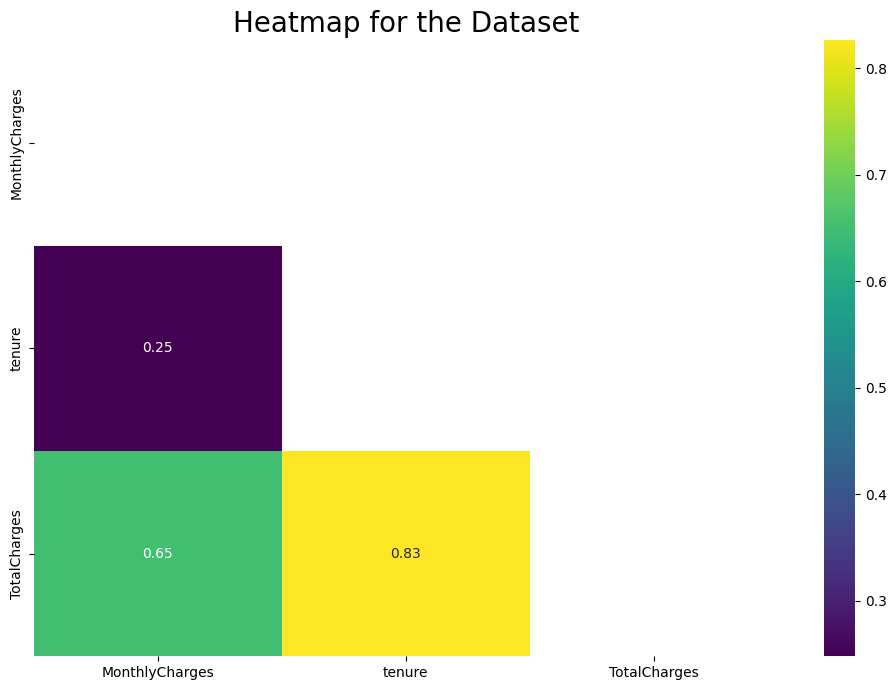

In [89]:
#HeatMap - Finding correlation between numeric variables
plt.rcParams['figure.figsize'] = (12, 8)

corr = data[['MonthlyCharges', 'tenure', 'TotalCharges']].corr()
matrix = np.triu(corr)

sns.heatmap(corr, annot = True, cmap = "viridis", mask = matrix)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

In [91]:
### Identifiyng main correlations between categoric variables and churn

new_cols_categoric = data.columns.difference(['tenure', 'MonthlyCharges', 'Churn', 'customerID', 'TotalCharges']).values

princ_rel_churn_array = []
rel_churn_array = []

for f in new_cols_categoric:
    fator = f
    sumar1 = pd.crosstab(data[fator], data.Churn, normalize=True)*100
    sumar1 = sumar1[['Yes', 'No']]
    sumar1[(sumar1.index != 0)]
    largest_correlation = sumar1.loc[sumar1['Yes'] == sumar1['Yes'].max()]
    princ_rel_churn_array.append(largest_correlation.index[0])
    rel_churn_array.append(largest_correlation['Yes'].iloc[0])

df_result = pd.DataFrame({"Factor" : new_cols_categoric, "Main Atribute" : princ_rel_churn_array, "Correlation" : rel_churn_array})
df_result = df_result.set_index('Factor')
df_result.sort_values('Correlation', ascending=False)
df_result['Factor_Atribute'] = df_result.index + " - " + df_result['Main Atribute']
df_result

,Main Atribute,Correlation,Factor_Atribute
Factor,,,
Contract,Month-to-month,23.498509,Contract - Month-to-month
Dependents,No,21.908278,Dependents - No
DeviceProtection,No,17.194377,DeviceProtection - No
InternetService,Fiber optic,18.415448,InternetService - Fiber optic
MultipleLines,Yes,12.068721,MultipleLines - Yes
OnlineBackup,No,17.506744,OnlineBackup - No
OnlineSecurity,No,20.744001,OnlineSecurity - No
PaperlessBilling,Yes,19.877893,PaperlessBilling - Yes
Partner,No,17.038194,Partner - No


<BarContainer object of 16 artists>

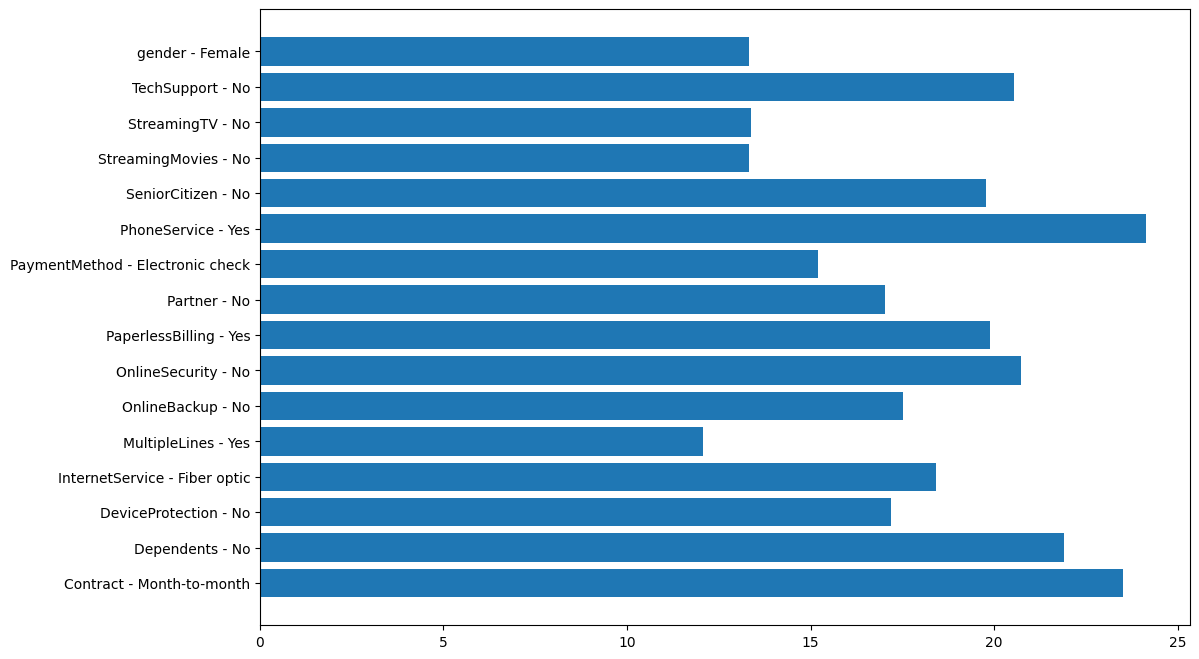

In [93]:
### Graph of categoric variables with larger churn correlations

fig, ax = plt.subplots()
ax.barh(df_result['Factor_Atribute'], df_result.Correlation)

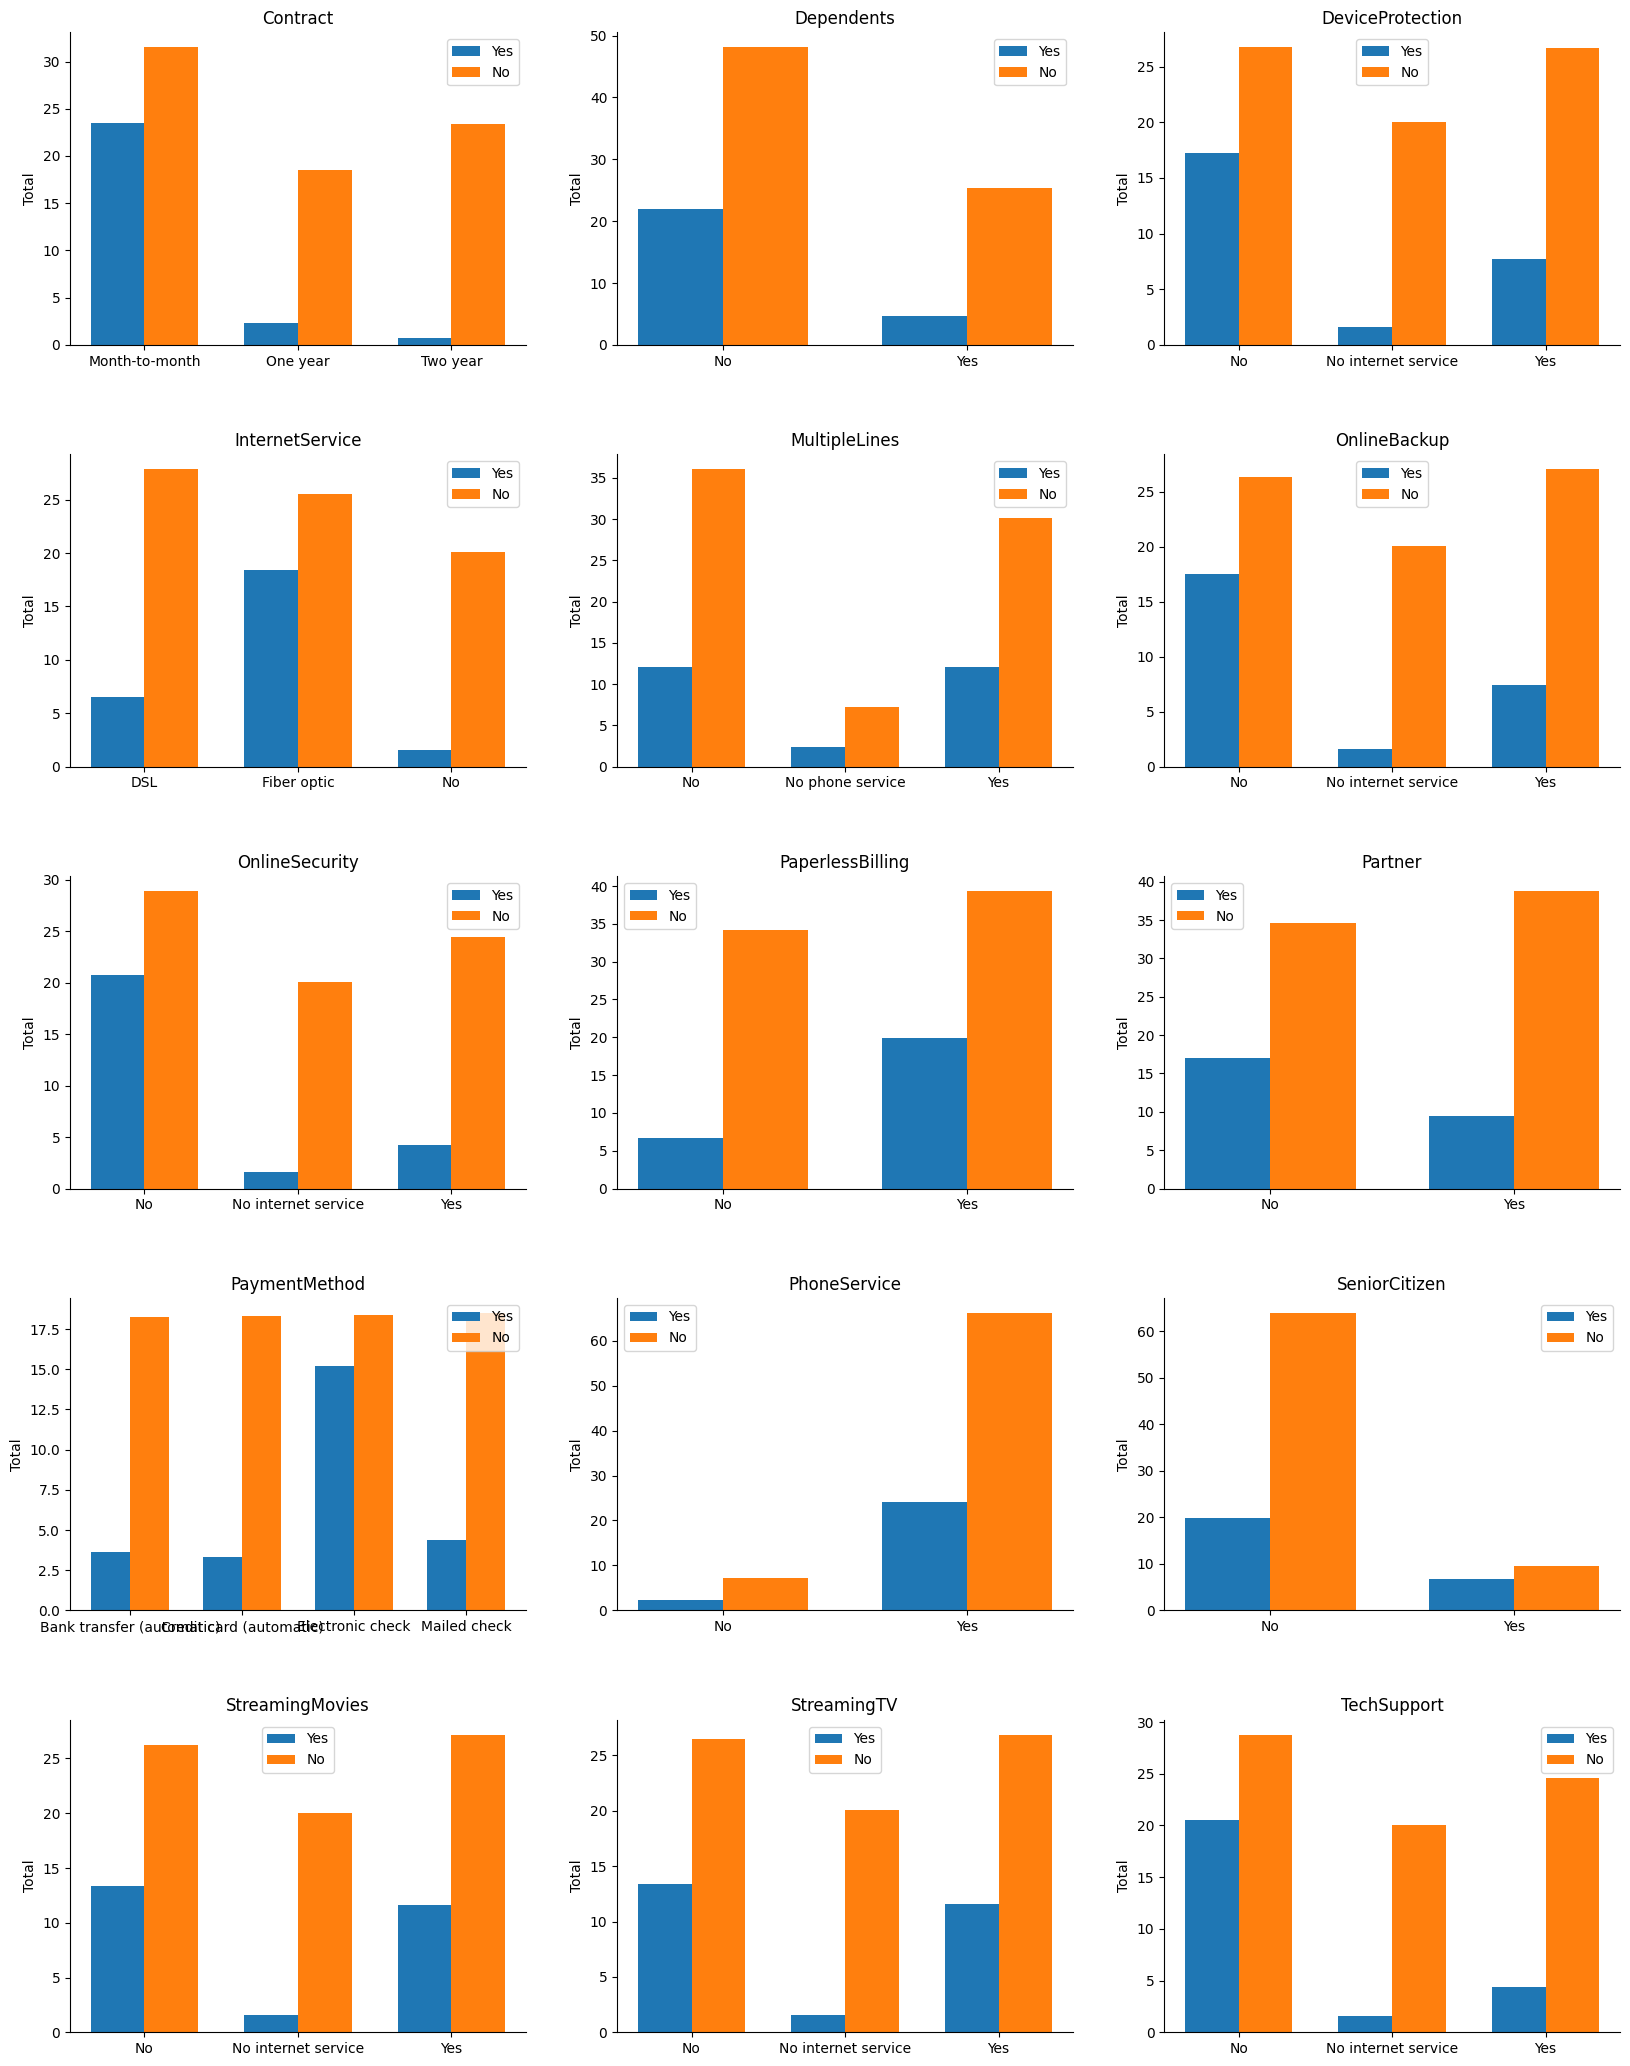

In [17]:
### Graph with all variables

columns = 3
if (len(new_cols_categoric)%columns) != 0:
  rows = (len(new_cols_categoric)//columns)
else:
  rows = (len(new_cols_categoric)//columns)

fig, ax = plt.subplots(rows, columns, figsize=(20,25))
k = 0
for i in range(0,rows):
  for j in range(0,columns):
    aux = data[new_cols_categoric[k]]
    sumar1 = pd.crosstab(data[new_cols_categoric[k]], data.Churn, normalize=True)*100
    sumar1 = sumar1[['Yes', 'No']]
    sumar1 = sumar1[(sumar1.index != 0)]
    x=np.arange(len(sumar1.index))
    width = 0.35
    ax[i][j].bar(x - width/2, sumar1['Yes'], width, label='Yes')
    ax[i][j].bar(x + width/2, sumar1['No'], width, label='No')

    ax[i][j].set_title(new_cols_categoric[k])
    ax[i][j].set_ylabel('Total')
    ax[i][j].legend(labels=['Yes', 'No'])
    ax[i][j].set_xticks(x)
    ax[i][j].set_xticklabels(sumar1.index)

    ax[i][j].spines['top'].set_visible(False)
    ax[i][j].spines['right'].set_visible(False)

    k+=1   
#plt.tight_layout()
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

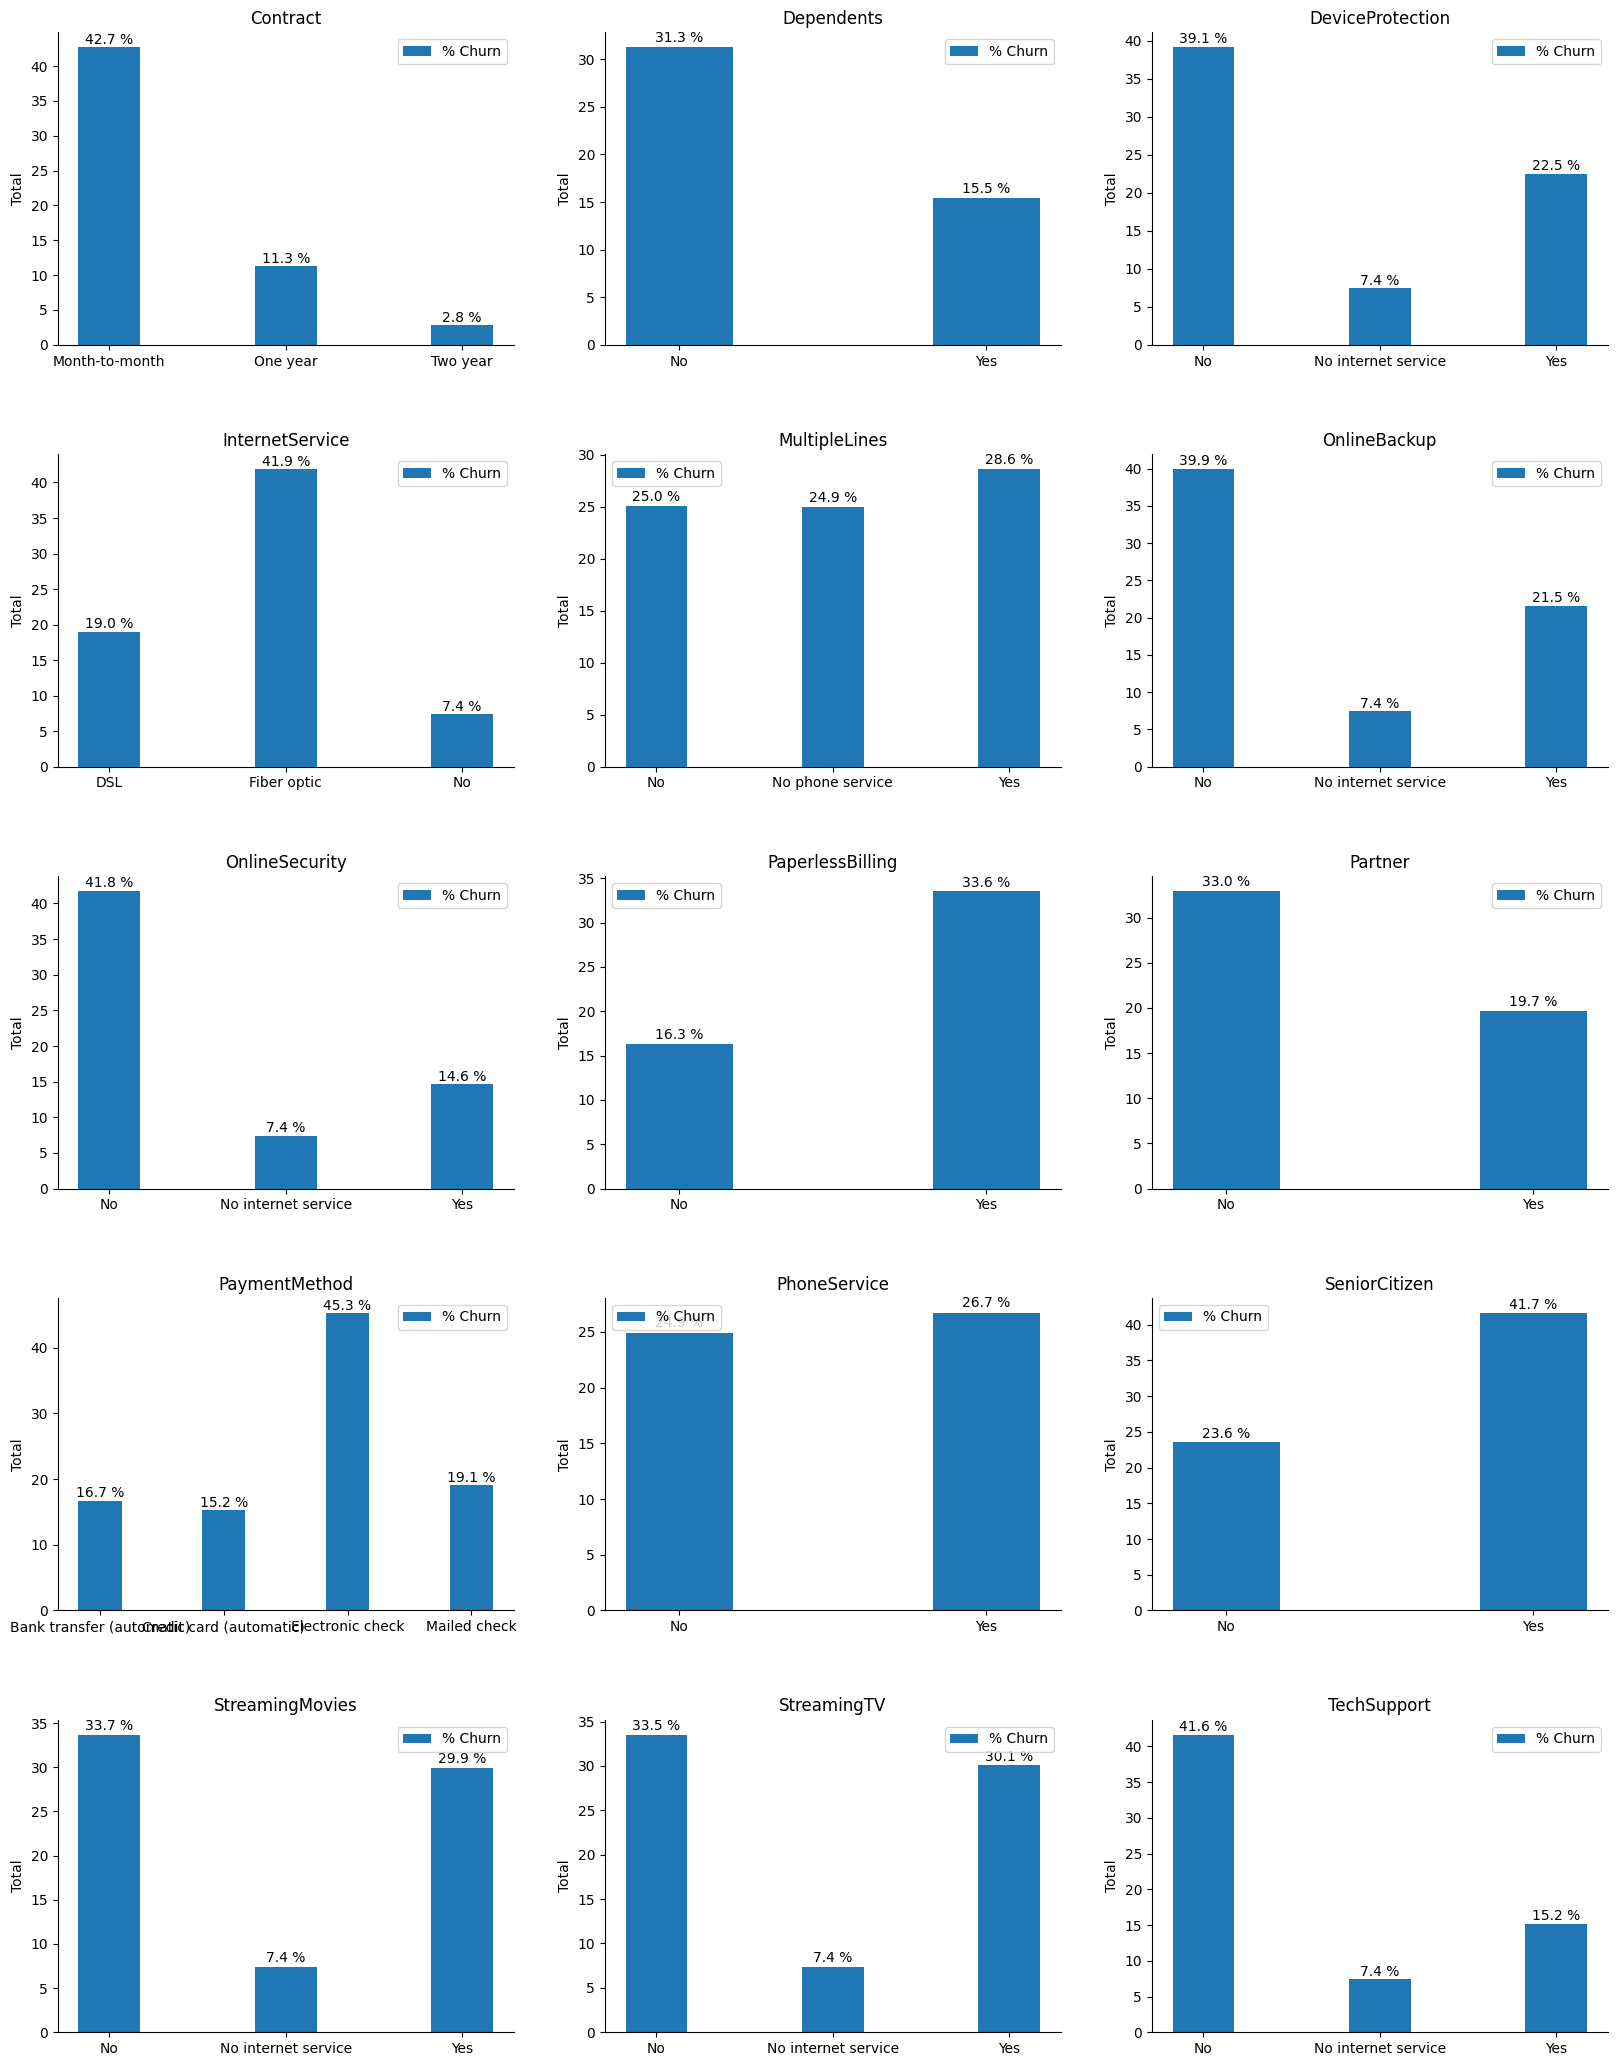

In [18]:
### Graph with all variables - % Churn

columns = 3
if (len(new_cols_categoric)%columns) != 0:
  rows = (len(new_cols_categoric)//columns)
else:
  rows = (len(new_cols_categoric)//columns)

fig, ax = plt.subplots(rows, columns, figsize=(20,25))
k = 0
for i in range(0,rows):
  for j in range(0,columns):
    aux = data[new_cols_categoric[k]]
    sumar1 = pd.crosstab(data[new_cols_categoric[k]], data.Churn, normalize=True)*100
    sumar1 = sumar1[['Yes', 'No']]
    sumar1 = sumar1[(sumar1.index != 0)]
    sumar1['churnPer'] = 100 * sumar1['Yes'] / (sumar1['Yes'] + sumar1['No'])
    x=np.arange(len(sumar1.index))
    width = 0.35
    ax[i][j].bar(x , sumar1['churnPer'], width, label='churnPer')

    ax[i][j].set_title(new_cols_categoric[k])
    ax[i][j].set_ylabel('Total')
    ax[i][j].legend(labels=['% Churn'])
    ax[i][j].set_xticks(x)
    ax[i][j].set_xticklabels(sumar1.index)

    ax[i][j].spines['top'].set_visible(False)
    ax[i][j].spines['right'].set_visible(False)

    for l in x:
      n = sumar1['churnPer'].iloc[l]
      ax[i][j].annotate(text=str(round(n, 1)) + ' %', xy=(l, n + 0.5), ha='center')

    k+=1   

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

In [19]:
### Applying qui-2 to determine statistical correlation between categorial values and churn

from scipy.stats import chi2_contingency

factors = new_cols_categoric
alpha_values = []
stat_values = []
GL_values = []
p_value = []
result_qui2 = []

for fator in factors:
    sumar1 = pd.crosstab(data[fator], data.Churn)
    data_qui2 = []

    for i in sumar1.index.tolist():
        ### Defining table
        data_qui2.extend(sumar1.loc[sumar1.index == i].values.tolist())

    stat, p, dof, expected = chi2_contingency(data_qui2)

    # interpret p-value
    alpha = 0.001
    stat_values.append(stat)
    GL_values.append(dof)
    p_value.append(p)
    alpha_values.append(alpha)

    if p <= alpha:
        result_qui2.append('Dependent (reject H0)')
    else:
        result_qui2.append('Independent (H0 holds true)')

df_result_qui2 = pd.DataFrame({'factors' : factors, 'stat' : stat_values, 'DF_value' : GL_values, 'p_value' : p_value, 'result' : result_qui2})
df_result_qui2.sort_values('p_value').reset_index(drop=True)

,factors,stat,DF_value,p_value,result
0,Contract,1184.596572,2,5.863038e-258,Dependent (reject H0)
1,OnlineSecurity,849.998968,2,2.661150e-185,Dependent (reject H0)
2,TechSupport,828.197068,2,1.443084e-180,Dependent (reject H0)
3,InternetService,732.309590,2,9.571788e-160,Dependent (reject H0)
4,PaymentMethod,648.142327,3,3.682355e-140,Dependent (reject H0)
5,OnlineBackup,601.812790,2,2.079759e-131,Dependent (reject H0)
6,DeviceProtection,558.419369,2,5.505219e-122,Dependent (reject H0)
7,StreamingMovies,375.661479,2,2.667757e-82,Dependent (reject H0)
8,StreamingTV,374.203943,2,5.528994e-82,Dependent (reject H0)
9,PaperlessBilling,258.277649,1,4.073355e-58,Dependent (reject H0)


### **Conclusion**

As it is observed on the analisys, there are some categorial values with larger churn indicators:
- PaymentMethod - Eletronic Check
- Contract - Month to Month
- Device protection - No
- Online Security - No
- Online Backup - No

Whats it is missing to discover:
- Are there any numeric variable churn correlation?


In [20]:
df_mean = data[['MonthlyCharges', 'tenure', 'TotalCharges', 'Churn']].groupby('Churn').mean()
df_mean = df_mean[(df_mean.index != 0)]
df_mean = df_mean.T
df_median = data[['MonthlyCharges', 'tenure', 'TotalCharges', 'Churn']].groupby('Churn').median()
df_median = df_median[(df_median.index != 0)]
df_median = df_median.T

print('Mean', '\n', df_mean, '\n')
print('Median', '\n', df_median, '\n')

Mean 
 Churn                    No          Yes
MonthlyCharges    61.265124    74.441332
tenure            37.569965    17.979133
TotalCharges    2549.911442  1531.796094 

Median 
 Churn                 No     Yes
MonthlyCharges    64.425   79.65
tenure            38.000   10.00
TotalCharges    1679.525  703.55 



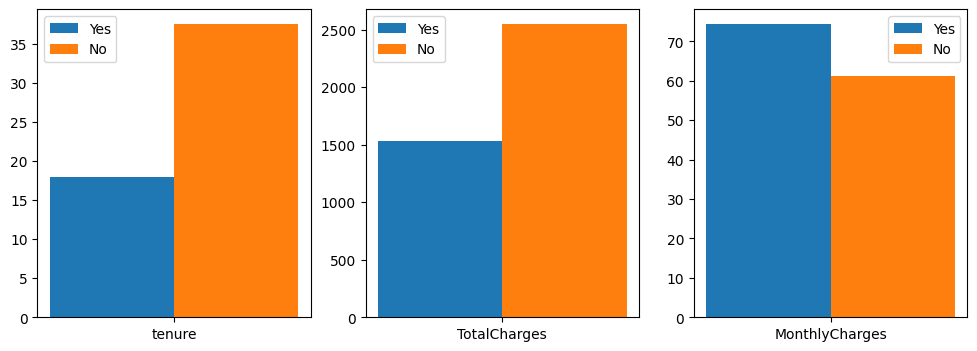

In [94]:
### Numeric variables churn correlation

fig, ax = plt.subplots(1, 3, figsize = (12,4))

x=np.arange(1)
width = 0.35

ax[0].bar(x - width/2, df_mean[df_mean.index == 'tenure']['Yes'], width)
ax[0].bar(x + width/2, df_mean[df_mean.index == 'tenure']['No'], width)
ax[0].legend(labels=['Yes', 'No'])
ax[0].set_xticks(x)
ax[0].set_xticklabels(df_mean[df_mean.index == 'tenure'].index)

ax[1].bar(x - width/2, df_mean[df_mean.index == 'TotalCharges']['Yes'], width)
ax[1].bar(x + width/2, df_mean[df_mean.index == 'TotalCharges']['No'], width)
ax[1].legend(labels=['Yes', 'No'])
ax[1].set_xticks(x)
ax[1].set_xticklabels(df_mean[df_mean.index == 'TotalCharges'].index)

ax[2].bar(x - width/2, df_mean[df_mean.index == 'MonthlyCharges']['Yes'], width)
ax[2].bar(x + width/2, df_mean[df_mean.index == 'MonthlyCharges']['No'], width)
ax[2].legend(labels=['Yes', 'No'])
ax[2].set_xticks(x)
ax[2].set_xticklabels(df_mean[df_mean.index == 'MonthlyCharges'].index)

plt.show()

### **MULTIVARIABLE EDA**

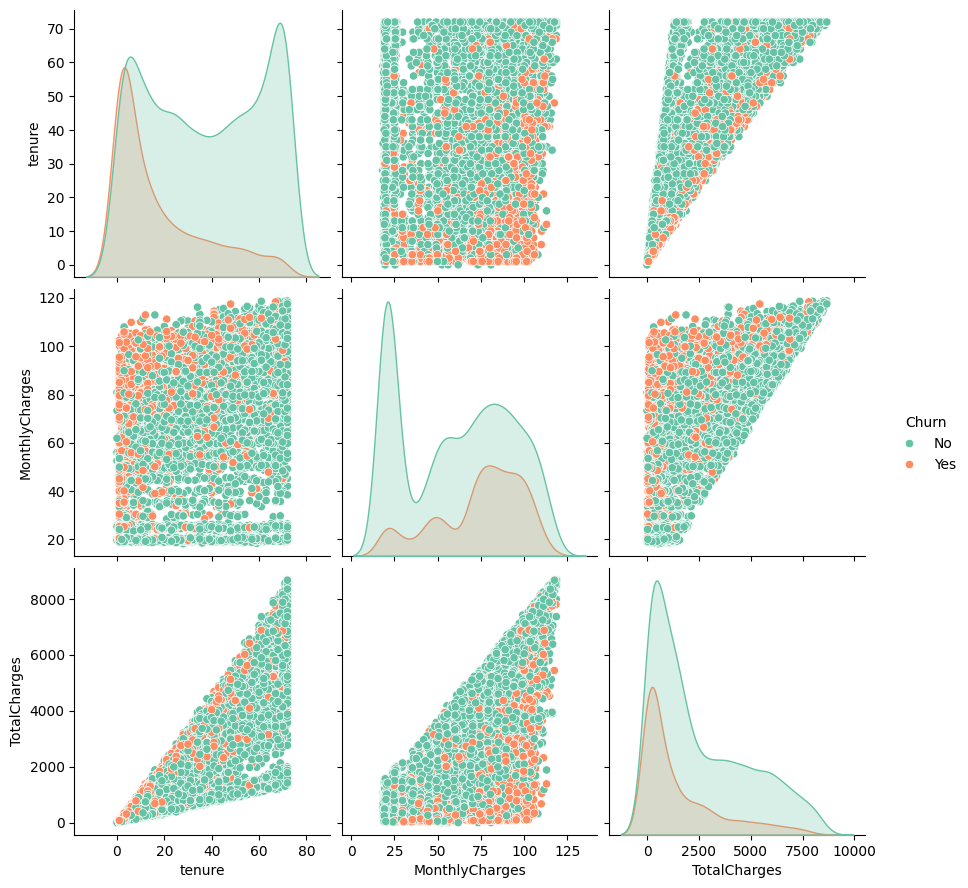

In [22]:
# Churn analisys
sns.pairplot(data.drop(columns=('SeniorCitizen')), hue = 'Churn' , height = 3 , palette = 'Set2')

### **MODEL SELECTION**

Project objective -> Create score to identify customers more likely to churn to, through proactive relationship, reduce customer churn.

It will be done a analisys from different machine learning models using similar hyperparameters to itentify the best model. Later, hyperparameter optimization.

In [23]:
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

Target (y) = Churn


In [24]:
### Transforming categoric variables to dummies 
### Removing customer ID

df_dummy0 = pd.get_dummies(data.drop(columns=['customerID', 'Churn']))
df_dummy0.columns 

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
     

In [25]:
### Separating 'Yes', 'No' into 1 and 0

data['Churn'] = data['Churn'].replace(('Yes', 'No'), (1, 0))

# Separating X and y
X = df_dummy0
y = data.Churn

# Dividing 30% for test and 70% for train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, 
                                                          random_state = 42)

In [95]:
def fit_model_metrics(model, X_train, y_train):
    # Model fit
    model = model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    # Train accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Precision
    prec = precision_score(y_test, y_test_pred)

    # Recall
    rec = recall_score(y_test, y_test_pred)

    # F1 score
    f1 = f1_score(y_test, y_test_pred)

    print('% Train accuracy:', train_accuracy)
    print('% Test accuracy:', test_accuracy)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)

    result = {'Train accuracy' : train_accuracy, 'Test accuracy' : test_accuracy, 'Precision' : prec, 'Recall' : rec, 'F1 Score' : f1}

    return result

In [27]:
### Decision Tree

dstree = DecisionTreeClassifier()

decision_tree = fit_model_metrics(dstree, X_train, y_train)

result_metrics = pd.DataFrame(data = decision_tree, index=['01 - Decison Tree'])
result_metrics

% Train accuracy: 0.9983772819472616
% Test accuracy: 0.7453857075248462
Precision: 0.5330882352941176
Recall: 0.5052264808362369
F1 Score: 0.518783542039356


,Train accuracy,Test accuracy,Precision,Recall,F1 Score
01 - Decison Tree,0.998377,0.745386,0.533088,0.505226,0.518784


In [28]:
### Random forest
rf = RandomForestClassifier()

dict_rf = fit_model_metrics(rf, X_train, y_train)

result_metrics = pd.concat([result_metrics, pd.DataFrame(data = dict_rf, index=['02 - Randon Forest'])])
result_metrics

% Train accuracy: 0.9983772819472616
% Test accuracy: 0.7979176526265973
Precision: 0.6805896805896806
Recall: 0.48257839721254353
F1 Score: 0.564729867482161


,Train accuracy,Test accuracy,Precision,Recall,F1 Score
01 - Decison Tree,0.998377,0.745386,0.533088,0.505226,0.518784
02 - Randon Forest,0.998377,0.797918,0.680590,0.482578,0.564730


In [29]:
### Logistic Regression

log_reg = LogisticRegression(max_iter=100000)

dict_reglog = fit_model_metrics(log_reg, X_train, y_train)

result_metrics = pd.concat([result_metrics, pd.DataFrame(data = dict_reglog, index=['03 - Logistic Regression'])])
result_metrics

% Train accuracy: 0.8058823529411765
% Test accuracy: 0.8121154756270705
Precision: 0.6832298136645962
Recall: 0.5749128919860628
F1 Score: 0.6244087038789026


,Train accuracy,Test accuracy,Precision,Recall,F1 Score
01 - Decison Tree,0.998377,0.745386,0.533088,0.505226,0.518784
02 - Randon Forest,0.998377,0.797918,0.680590,0.482578,0.564730
03 - Logistic Regression,0.805882,0.812115,0.683230,0.574913,0.624409


In [30]:
### KNN

knn = KNeighborsClassifier()

dict_knn = fit_model_metrics(knn, X_train, y_train)

result_metrics = pd.concat([result_metrics, pd.DataFrame(data = dict_knn, index=['04 - KNN'])])
result_metrics

% Train accuracy: 0.8302231237322515
% Test accuracy: 0.7728348319924279
Precision: 0.6068181818181818
Recall: 0.4651567944250871
F1 Score: 0.5266272189349113


,Train accuracy,Test accuracy,Precision,Recall,F1 Score
01 - Decison Tree,0.998377,0.745386,0.533088,0.505226,0.518784
02 - Randon Forest,0.998377,0.797918,0.680590,0.482578,0.564730
03 - Logistic Regression,0.805882,0.812115,0.683230,0.574913,0.624409
04 - KNN,0.830223,0.772835,0.606818,0.465157,0.526627


In [31]:
### SVM 
### Need to apply 2 parameters to bring consistent results

svm = SVC(C = 50, kernel = 'rbf')

dict_svm = fit_model_metrics(svm, X_train, y_train)
result_metrics = pd.concat([result_metrics, pd.DataFrame(data = dict_svm, index=['05 - SVM'])])
result_metrics

% Train accuracy: 0.7825557809330629
% Test accuracy: 0.7808802650260294
Precision: 0.6989247311827957
Recall: 0.3397212543554007
F1 Score: 0.45720984759671746


,Train accuracy,Test accuracy,Precision,Recall,F1 Score
01 - Decison Tree,0.998377,0.745386,0.533088,0.505226,0.518784
02 - Randon Forest,0.998377,0.797918,0.680590,0.482578,0.564730
03 - Logistic Regression,0.805882,0.812115,0.683230,0.574913,0.624409
04 - KNN,0.830223,0.772835,0.606818,0.465157,0.526627
05 - SVM,0.782556,0.780880,0.698925,0.339721,0.457210


In [32]:
# Gradient Boosting

grad = GradientBoostingClassifier()
 
dict_gradient = fit_model_metrics(grad, X_train, y_train)
result_metrics = pd.concat([result_metrics, pd.DataFrame(data = dict_gradient, index=['06 - Gradient Boosting'])])
result_metrics

% Train accuracy: 0.8265720081135902
% Test accuracy: 0.807382867960246
Precision: 0.6868008948545862
Recall: 0.5348432055749129
F1 Score: 0.6013712047012733


,Train accuracy,Test accuracy,Precision,Recall,F1 Score
01 - Decison Tree,0.998377,0.745386,0.533088,0.505226,0.518784
02 - Randon Forest,0.998377,0.797918,0.680590,0.482578,0.564730
03 - Logistic Regression,0.805882,0.812115,0.683230,0.574913,0.624409
04 - KNN,0.830223,0.772835,0.606818,0.465157,0.526627
05 - SVM,0.782556,0.780880,0.698925,0.339721,0.457210
06 - Gradient Boosting,0.826572,0.807383,0.686801,0.534843,0.601371


In [96]:
### Adaboost

ada = AdaBoostClassifier(algorithm='SAMME')

dict_ada = fit_model_metrics(ada, X_train, y_train)
result_metrics = pd.concat([result_metrics, pd.DataFrame(data = dict_ada, index=['07 - Ada Boost'])])
result_metrics

% Train accuracy: 0.7991886409736308
% Test accuracy: 0.7931850449597728
Precision: 0.6574712643678161
Recall: 0.49825783972125437
F1 Score: 0.5668979187314173


,Train accuracy,Test accuracy,Precision,Recall,F1 Score
01 - Decison Tree,0.998377,0.745386,0.533088,0.505226,0.518784
02 - Randon Forest,0.998377,0.797918,0.680590,0.482578,0.564730
03 - Logistic Regression,0.805882,0.812115,0.683230,0.574913,0.624409
04 - KNN,0.830223,0.772835,0.606818,0.465157,0.526627
05 - SVM,0.782556,0.780880,0.698925,0.339721,0.457210
06 - Gradient Boosting,0.826572,0.807383,0.686801,0.534843,0.601371
07 - Ada Boost,0.808925,0.801704,0.672606,0.526132,0.590420
08 - XG Boost,0.948479,0.785140,0.628205,0.512195,0.564299
09 - Light GBM,0.885801,0.795078,0.650964,0.529617,0.584054
07 - Ada Boost,0.799189,0.793185,0.657471,0.498258,0.566898


In [34]:
### Xgboost

xgboost = xgb.XGBClassifier()

dict_xgb = fit_model_metrics(xgboost, X_train, y_train)

result_metrics = pd.concat([result_metrics, pd.DataFrame(data = dict_xgb, index=['08 - XG Boost'])])
result_metrics

% Train accuracy: 0.9484787018255578
% Test accuracy: 0.7851396119261713
Precision: 0.6282051282051282
Recall: 0.5121951219512195
F1 Score: 0.564299424184261


,Train accuracy,Test accuracy,Precision,Recall,F1 Score
01 - Decison Tree,0.998377,0.745386,0.533088,0.505226,0.518784
02 - Randon Forest,0.998377,0.797918,0.680590,0.482578,0.564730
03 - Logistic Regression,0.805882,0.812115,0.683230,0.574913,0.624409
04 - KNN,0.830223,0.772835,0.606818,0.465157,0.526627
05 - SVM,0.782556,0.780880,0.698925,0.339721,0.457210
06 - Gradient Boosting,0.826572,0.807383,0.686801,0.534843,0.601371
07 - Ada Boost,0.808925,0.801704,0.672606,0.526132,0.590420
08 - XG Boost,0.948479,0.785140,0.628205,0.512195,0.564299


In [35]:
### LigthGBM

lgb_class = lgb.LGBMClassifier()

dict_lgb = fit_model_metrics(lgb_class, X_train, y_train)
result_metrics = pd.concat([result_metrics, pd.DataFrame(data = dict_lgb, index=['09 - Light GBM'])])
result_metrics

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1295, number of negative: 3635
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262677 -> initscore=-1.032098
[LightGBM] [Info] Start training from score -1.032098
% Train accuracy: 0.8858012170385395
% Test accuracy: 0.7950780880265026
Precision: 0.6509635974304069
Recall: 0.5296167247386759
F1 Score: 0.5840537944284342


,Train accuracy,Test accuracy,Precision,Recall,F1 Score
01 - Decison Tree,0.998377,0.745386,0.533088,0.505226,0.518784
02 - Randon Forest,0.998377,0.797918,0.680590,0.482578,0.564730
03 - Logistic Regression,0.805882,0.812115,0.683230,0.574913,0.624409
04 - KNN,0.830223,0.772835,0.606818,0.465157,0.526627
05 - SVM,0.782556,0.780880,0.698925,0.339721,0.457210
06 - Gradient Boosting,0.826572,0.807383,0.686801,0.534843,0.601371
07 - Ada Boost,0.808925,0.801704,0.672606,0.526132,0.590420
08 - XG Boost,0.948479,0.785140,0.628205,0.512195,0.564299
09 - Light GBM,0.885801,0.795078,0.650964,0.529617,0.584054


In [36]:
result_metrics.index.name = 'Model'
result_metrics.sort_values('F1 Score', ascending=False)

,Train accuracy,Test accuracy,Precision,Recall,F1 Score
Model,,,,,
03 - Logistic Regression,0.805882,0.812115,0.683230,0.574913,0.624409
06 - Gradient Boosting,0.826572,0.807383,0.686801,0.534843,0.601371
07 - Ada Boost,0.808925,0.801704,0.672606,0.526132,0.590420
09 - Light GBM,0.885801,0.795078,0.650964,0.529617,0.584054
02 - Randon Forest,0.998377,0.797918,0.680590,0.482578,0.564730
08 - XG Boost,0.948479,0.785140,0.628205,0.512195,0.564299
04 - KNN,0.830223,0.772835,0.606818,0.465157,0.526627
01 - Decison Tree,0.998377,0.745386,0.533088,0.505226,0.518784
05 - SVM,0.782556,0.780880,0.698925,0.339721,0.457210


In [37]:
### Defining grid search function -> Scoring: F1

def grid_search_F1(model, param_grid, X_train, y_train):
    model = GridSearchCV(model, param_grid=param_grid, scoring='f1', cv=5)
    model.fit(X_train, y_train)
    return [model.best_params_, model.best_score_]

In [38]:
### Decision tree grid search

param_grid_tree = {'criterion':['gini', 'log_loss', 'entropy'],
                    'min_samples_split': [2,3,5,10],
                    'min_samples_leaf': [1,2,3,5], 
                    'random_state':[25,100,500]}

result_grid_tree = grid_search_F1(dstree, param_grid_tree, X_train, y_train)
result_grid_tree

[{'criterion': 'log_loss',
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'random_state': 25},
 0.5124777463779395]

In [39]:
### Randon forest grid search

param_grid_rf = {'n_estimators':[50,100],
                 'criterion':['gini', 'log_loss', 'entropy'],
                 'min_samples_leaf': [1,3,5], 
                 'random_state':[25,100,200]}

result_grid_rf = grid_search_F1(rf, param_grid_rf, X_train, y_train)
result_grid_rf

[{'criterion': 'gini',
  'min_samples_leaf': 5,
  'n_estimators': 100,
  'random_state': 100},
 0.5620914951222866]

In [40]:
### Logistic regression grid search

param_grid_log_reg = {'penalty' : ['l2'],
                     'C': [1,3,10],
                     'random_state':[25,100,500]}

result_grid_log_reg = grid_search_F1(log_reg, param_grid_log_reg, X_train, y_train)
result_grid_log_reg

[{'C': 10, 'penalty': 'l2', 'random_state': 25}, 0.5853101478873558]

In [41]:
### KNN grid search

param_grid_knn = {'n_neighbors':np.arange(1, 10),
                    'weights': ['uniform', 'distance'], 
                    'leaf_size':[1,3,5,7,10],
                    'algorithm':['auto', 'kd_tree']}

result_grid_knn = grid_search_F1(knn, param_grid_knn, X_train, y_train)
result_grid_knn

[{'algorithm': 'kd_tree',
  'leaf_size': 10,
  'n_neighbors': 5,
  'weights': 'uniform'},
 0.48965041930186876]

In [42]:
### SVM Grid Search

svm = SVC()

param_grid_SVM = {'C': [50],
                  'kernel' : ['linear', 'poly', 'rbf'],
                  'degree' : [3]}

result_grid_SVM = grid_search_F1(svm, param_grid_SVM, X_train, y_train)
result_grid_SVM

[{'C': 50, 'degree': 3, 'kernel': 'linear'}, 0.5090328136057649]

In [54]:
### Gradient Boost Grid Search

param_grid_grad = {'loss': ['log_loss', 'exponential'],
                  'learning_rate' : [0.1, 1, 10],
                  'n_estimators':[50,100,200]}

result_grid_grad = grid_search_F1(grad, param_grid_grad, X_train, y_train)
result_grid_grad

[{'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 50},
 0.5710448517608299]

In [43]:
### Ada Boost Grid Search

param_grid_ada = {'algorithm':['SAMME'],
                  'n_estimators':[50,100,200],
                  'learning_rate' : [0.1, 1, 10],
                  'random_state':[25,100,500]}

result_grid_ada = grid_search_F1(ada, param_grid_ada, X_train, y_train)
result_grid_ada

[{'algorithm': 'SAMME',
  'learning_rate': 1,
  'n_estimators': 100,
  'random_state': 25},
 0.5733082892838418]

In [44]:
### XG Boost Grid Search

param_grid_xgboost = {'booster': ['gbtree', 'gblinear', 'dart'],
                      'eta' : [0.1, 1, 10]}

result_grid_xgboost = grid_search_F1(xgboost, param_grid_xgboost, X_train, y_train)
result_grid_xgboost

[{'booster': 'gblinear', 'eta': 0.1}, 0.5777055633346417]

In [53]:
### LightGBM Grid Search

param_grid_lgb = {'min_data_in_leaf': [20, 50, 100],
                  'bagging_seed' : [1, 5, 10],
                  'extra_trees' : [True, False]}

result_grid_lgb = grid_search_F1(lgb_class, param_grid_lgb, X_train, y_train)
result_grid_lgb

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1036, number of negative: 2908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262677 -> initscore=-1.032098
[LightGBM] [Info] Start training from score -1.032098
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


[{'bagging_seed': 1, 'extra_trees': True, 'min_data_in_leaf': 20},
 0.5627245238270915]

In [59]:

result_grid = pd.DataFrame(np.array(result_grid_tree), columns=['Decision Tree']).T
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_rf), columns=['Randon Forrest']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_log_reg), columns=['Logistic Regression']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_knn), columns=['KNN']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_grad), columns=['Gradient Boost']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_lgb), columns=['LigthGBM']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_ada), columns=['Adaboost']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_xgboost), columns=['Xgboost']).T])
#result_grid = pd.concat([result_grid, pd.DataFrame(np.array(result_grid_SVM), columns=['SVM']).T])
result_grid = pd.concat([result_grid, pd.DataFrame(np.array([{'C': 50, 'degree': 3, 'kernel': 'linear'}, 0.5090328136057649]), columns=['SVM']).T])
result_grid.columns = ['Params', 'F1']
result_grid.sort_values('F1', ascending=False)

,Params,F1
Logistic Regression,"{'C': 10, 'penalty': 'l2', 'random_state': 25}",0.58531
Xgboost,"{'booster': 'gblinear', 'eta': 0.1}",0.577706
Adaboost,"{'algorithm': 'SAMME', 'learning_rate': 1, 'n_...",0.573308
Gradient Boost,"{'learning_rate': 0.1, 'loss': 'log_loss', 'n_...",0.571045
LigthGBM,"{'bagging_seed': 1, 'extra_trees': True, 'min_...",0.562725
Randon Forrest,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.562091
Decision Tree,"{'criterion': 'log_loss', 'min_samples_leaf': ...",0.512478
SVM,"{'C': 50, 'degree': 3, 'kernel': 'linear'}",0.509033
KNN,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.48965


In [60]:
import shap
from sklearn.feature_extraction.text import TfidfVectorizer

shap.initjs()

c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [97]:
### Choosen model: Logistic Regression

vectorizer = TfidfVectorizer(min_df=5)
X_train_V = vectorizer.fit_transform(X_train).toarray() # sparse also works but Explanation slicing is not yet supported
X_test_V = vectorizer.transform(X_test).toarray()

model_def = LogisticRegression(max_iter=100000).fit(X_train, y_train)

explainer = shap.Explainer(model_def, X_train, feature_names=vectorizer.get_feature_names_out())
shap_values = explainer(X_test)

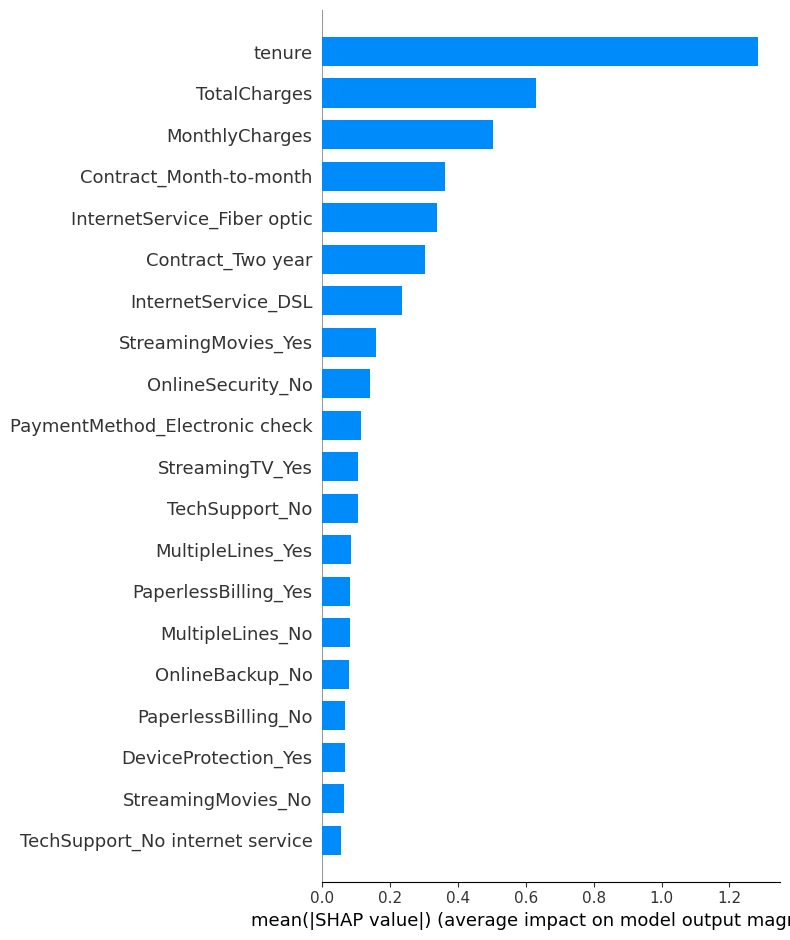

In [98]:
shap.summary_plot(shap_values, X_train, plot_type = "bar")